<a href="https://colab.research.google.com/github/hadeejahamz/CognoRise-Infotech/blob/main/CUSTOMER_PERSONALITY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *CUSTOMER PERSONALITY ANALYSIS*



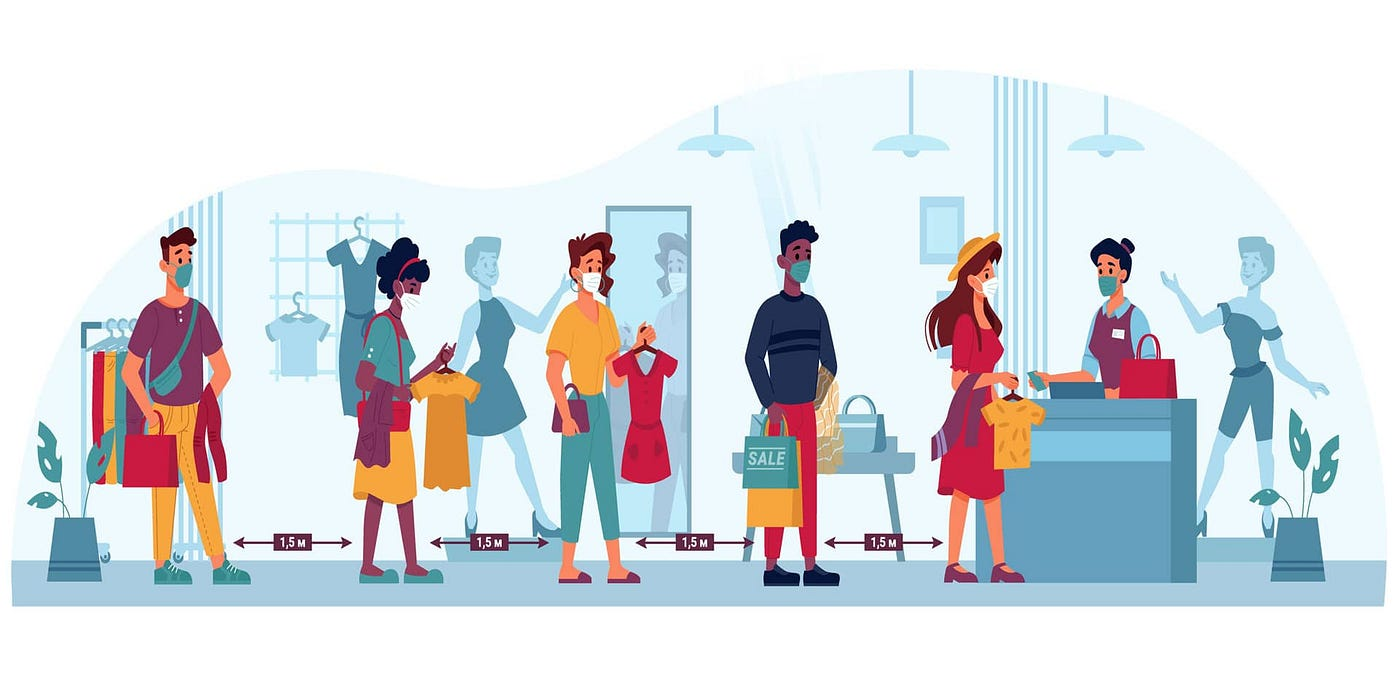


Understanding customer personality is crucial for businesses as it enables personalized interactions, tailored product offerings, and enhanced customer satisfaction. Analyzing customer personalities helps in creating targeted marketing strategies, fostering stronger relationships, and ultimately driving long-term loyalty. In the collaborative world of business, recognizing and adapting to diverse customer personalities is a key ingredient for success.





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')



#(numpy (np): A powerful library for numerical operations in Python, providing support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these elements.

#pandas (pd): Widely used for data manipulation and analysis. It provides data structures like DataFrame for efficient handling and manipulation of structured data.

#seaborn: A statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#matplotlib.pyplot (plt): A plotting library for creating static, animated, and interactive visualizations in Python. It is often used in conjunction with NumPy and Pandas.

#get_dummies: A pandas function used for one-hot encoding categorical variables, converting them into numerical format for machine learning models.
      #Categorical Variables: In the context of data, variables can be either numerical or categorical. Categorical variables represent categories or labels, such as colors, types, or any non-numeric values.
      #One-Hot Encoding: It's a technique used to convert categorical variables into a numerical format that machine learning models can understand. For each unique category in a column, one-hot encoding creates a new binary column (0 or 1) to indicate the presence or absence of that category.
      #get_dummies Function (in pandas): Specifically, in the pandas library, the get_dummies function is designed for one-hot encoding. It takes a DataFrame and converts categorical variables into numerical format by creating binary columns for each category.
    #In summary, when you use get_dummies on a DataFrame with categorical variables, it transforms those variables into a format suitable for machine learning algorithms that require numerical input, ensuring that the model can effectively learn patterns from the data

#KMeans (from sklearn.cluster): A popular clustering algorithm used for partitioning data into distinct groups based on similarity.

#StandardScaler (from sklearn.preprocessing): Standardizes features by removing the mean and scaling to unit variance, a common preprocessing step in machine learning.

#LabelEncoder (from sklearn.preprocessing): Converts categorical labels into numerical format, facilitating machine learning model training.

#KElbowVisualizer (from yellowbrick.cluster): A visual diagnostic tool for determining the optimal number of clusters in a dataset using the "elbow" method.
     #KElbowVisualizer (from yellowbrick.cluster): KElbowVisualizer is a tool provided by the yellowbrick library for visualizing and determining the optimal number of clusters in a dataset when performing clustering analysis. The visualization is based on the "elbow" method, which involves plotting the explained variation as a function of the number of clusters and looking for an "elbow" point where the rate of change sharply decreases. This point often indicates the optimal number of clusters.

#warnings: A module for handling warnings in Python, and in this case, it's configured to ignore them.)

In [ ]:
df_initial = pd.read_csv('/content/marketing_campaign.csv',sep='\t')
df_initial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Cleaning

In [ ]:
df_initial['Dt_Customer'] = pd.to_datetime(df_initial['Dt_Customer'])
    #This line of code converts the 'Dt_Customer' column in the DataFrame df_initial to datetime format using the pd.to_datetime function from the pandas library. This is often done when working with date-related data, as it allows for convenient manipulation and analysis of dates.

print("The oldest record on customer's enrollment:", min(df_initial['Dt_Customer']).date())
print("The newest record on customer's enrollment:", max(df_initial['Dt_Customer']).date())
    #These lines print out the oldest and newest enrollment dates in the 'Dt_Customer' column of the DataFrame after the conversion.
    #min(df_initial['Dt_Customer']) finds the earliest date, and max(df_initial['Dt_Customer']) finds the latest date in the 'Dt_Customer' column.
    #.date() is used to extract and display only the date part without the timestamp.
  #In summary, the code is converting the 'Dt_Customer' column to datetime format and then printing the oldest and newest enrollment dates from this column. This is useful for understanding the range of enrollment dates in the dataset.



The oldest record on customer's enrollment: 2012-01-08
The newest record on customer's enrollment: 2014-12-06


So, we are going to modify some features as well as create new ones for further analysis and modeling

Age: The age of the customers are the age in 2014 as it's the last record we have (6th Dec 2014) or we can round that up to 2015
Education: Narrowing down to 3 categories
Living_With: Narrowing down to 2 categories
Total_Children: Merging Kidhome and Teenhome columns into 1 column which describes the number of children living in the household
Dt_Customer: Extracting new features out of dates to make Day, Dayofweek, Month, and Year features
Is_Parent: Referring to the parenthood status
Total_Spent: Customer's total spent on products
Renaming several features for simplicity

In [ ]:
df_initial['Age'] = 2015 - df_initial['Year_Birth']
df_initial['Education'] = df_initial['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})
df_initial['Living_With'] = df_initial['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})
df_initial['Total_Children'] = df_initial['Kidhome'] + df_initial['Teenhome']

# Breaking down the date of customer's enrollment
df_initial['Day'] = df_initial['Dt_Customer'].apply(lambda x: x.day)
df_initial['Dayofweek'] = df_initial['Dt_Customer'].apply(lambda x: x.day_name())
df_initial['Month'] = df_initial['Dt_Customer'].apply(lambda x: x.month)
df_initial['Year'] = df_initial['Dt_Customer'].apply(lambda x: x.year)
      #df_initial['Dt_Customer']: This extracts the 'Dt_Customer' column from the DataFrame df_initial.
      #.apply(lambda x: x.day): This applies a lambda function to each element in the 'Dt_Customer' column. The lambda function lambda x: x.day is used to extract the day component from each datetime object in the 'Dt_Customer' column.
      #df_initial['Day']: This creates a new column named 'Day' in the DataFrame df_initial and assigns the extracted day values to it.
         #In summary, after executing this line of code, the DataFrame df_initial will have a new column 'Day' containing the day component of each date in the 'Dt_Customer' column. This can be useful for further analysis or visualizations based on the day of the month when customers enrolled.

df_initial['Is_Parent'] = df_initial['Total_Children'].apply(lambda x: 1 if x != 0 else 0)
df_initial['Total_Spent'] = df_initial['MntWines'] + df_initial['MntFruits'] + df_initial['MntMeatProducts'] + df_initial['MntFishProducts'] + df_initial['MntSweetProducts'] + df_initial['MntGoldProds']

# Clear description of feature
df_initial.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meats', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Golds'}, inplace=True)
df_initial.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

# Drop unnecessary columns and nan values
df_initial.dropna(inplace=True)
df_initial.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df = df_initial.copy()
     #This is a common practice when you want to perform operations on a DataFrame without modifying the original data. Making a copy ensures that any changes made to the new DataFrame (df in this case) won't alter the content of the original DataFrame (df_initial).

In [ ]:
print('Income:')
print(df['Income'].sort_values().tail(5))

print('\nAge:')
print(df['Age'].sort_values().tail(5))

# Get rid of outliers
df = df.drop(2233)
df = df[df['Age'] < 80]

Income:
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64

Age:
424      74
1950     75
192     115
339     116
239     122
Name: Age, dtype: int64


Data Visualisation

In [ ]:
sns.color_palette('viridis_r') #plasma_r

[(0.626579, 0.854645, 0.223353),
 (0.288921, 0.758394, 0.428426),
 (0.122312, 0.633153, 0.530398),
 (0.153364, 0.497, 0.557724),
 (0.212395, 0.359683, 0.55171),
 (0.275191, 0.194905, 0.496005)]

Text(0.5, 1.05, 'Feature Relationship')

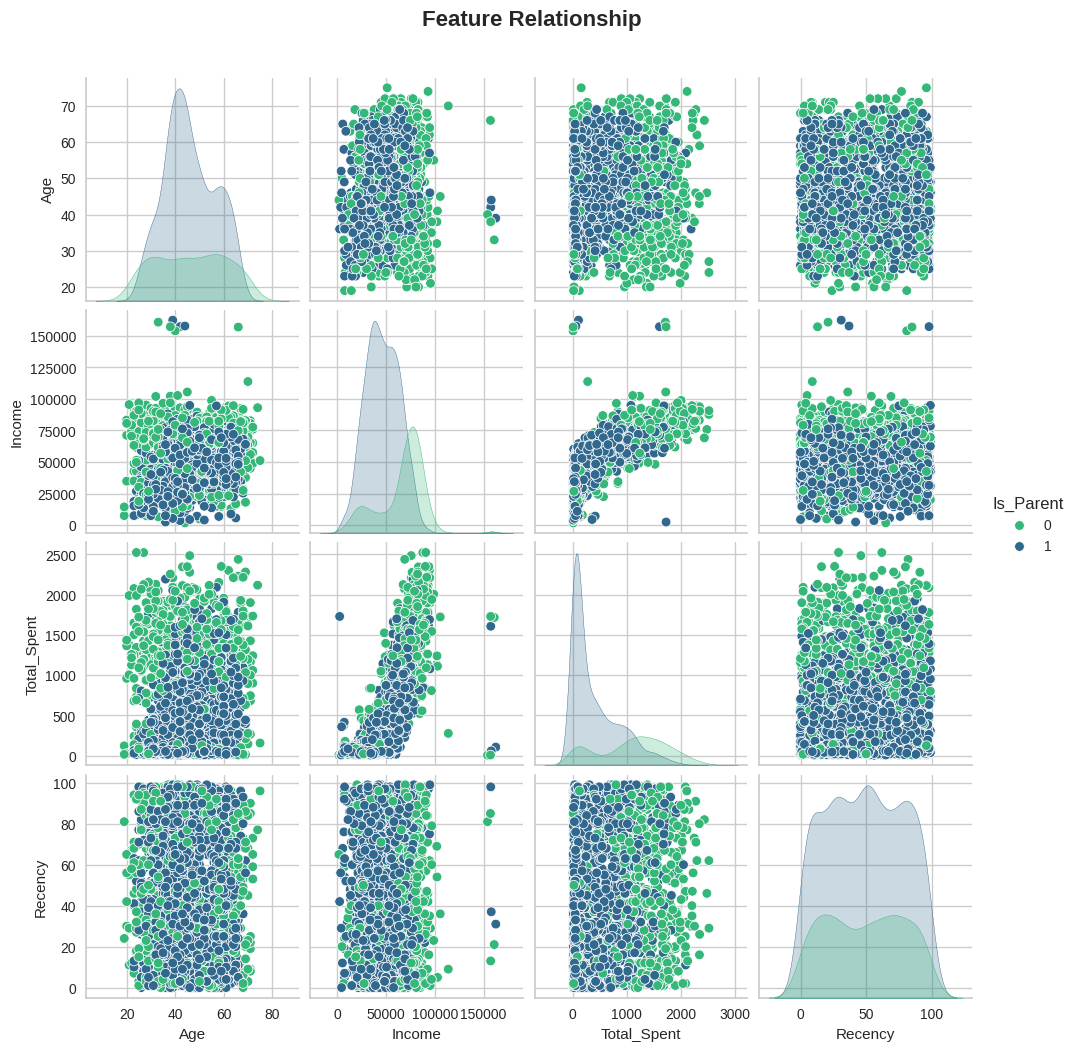

In [ ]:
data = ['Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent']

plot = sns.pairplot(df[data], hue='Is_Parent', palette='viridis_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)
   #This code utilizes Seaborn to create a pair plot, visualizing relationships between selected features ('Age', 'Income', 'Total_Spent', 'Recency', and 'Is_Parent') in the DataFrame df.

   #data List: data = ['Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent']: Defines a list of features ('Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent') that will be included in the pair plot.
   #Creating the Pair Plot: sns.pairplot(df[data], hue='Is_Parent', palette='copper_r'): This creates a pair plot using Seaborn. It visualizes the relationships between the specified features, with different colors for different values of the 'Is_Parent' column. The 'copper_r' palette is used for color variation.
   #Setting the Title: plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16): This sets the title of the pair plot. Adjustments like positioning (y=1.05), boldness (weight='bold'), and font size (fontsize=16) are specified for styling

Insights from graphs

At a glance, we can see that parents expended less
money on products than people who were not a parent yet

People who had higher income were more likely to expend more on products




<Axes: xlabel='Year', ylabel='count'>

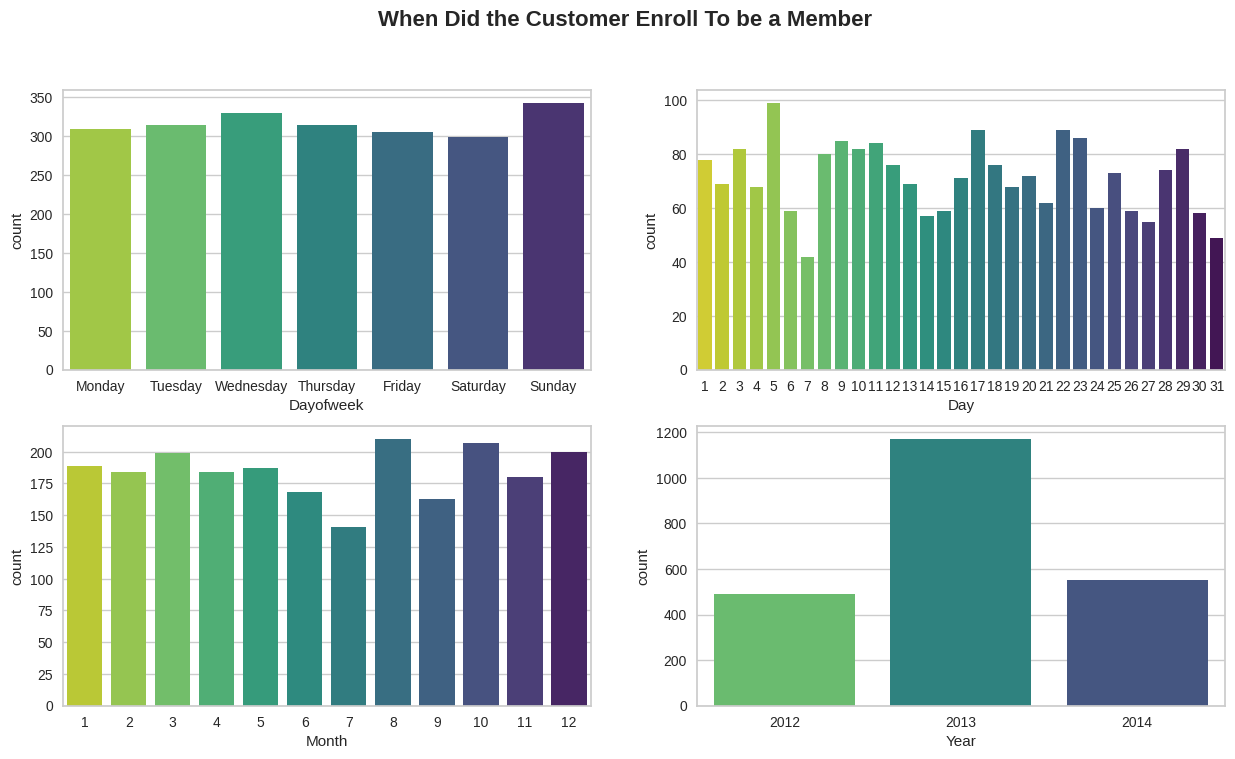

In [ ]:
# Convert 'Dayofweek' column to categorical with custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Dayofweek'] = pd.Categorical(df['Dayofweek'], categories=day_order, ordered=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

# Set the overall title
fig.suptitle("When Did the Customer Enroll To be a Member", weight='bold', fontsize=16)

# Plot 1: Count of enrollments on each day of the week
sns.countplot(x='Dayofweek', data=df, order=day_order, palette='viridis_r', ax=axes[0])

# Other plots remain unchanged
sns.countplot(x='Day', data=df, palette='viridis_r', ax=axes[1])
sns.countplot(x='Month', data=df, palette='viridis_r', ax=axes[2])
sns.countplot(x='Year', data=df, palette='viridis_r', ax=axes[3])

     ##convert 'Dayofweek' to Categorical:
     #day_order: Specifies the custom order for days of the week.
     #df['Dayofweek'] = pd.Categorical(df['Dayofweek'], categories=day_order, ordered=True): Converts the 'Dayofweek' column to a categorical data type with the specified order. This ensures that when plotting, the days of the week will be ordered according to 'day_order'.

    ##Create Subplots:
     #fig, axes = plt.subplots(2, 2, figsize=(15, 8)): Creates a 2x2 grid of subplots with a specified figure size.
     #axes = axes.flatten(): Flattens the 2D array of subplots into a 1D array for easier indexing.
    ##Set Overall Title:
     #fig.suptitle("When Did the Customer Enroll To be a Member", weight='bold', fontsize=16): Sets the overall title for the entire figure.
     #Plot 1: Count of enrollments on each day of the week:

    #sns.countplot(x='Dayofweek', data=df, order=day_order, palette='viridis_r', ax=axes[0]): Creates a count plot for the 'Dayofweek' column using Seaborn. The custom order is specified, and the 'viridis_r' color palette is used.
    #Other Plots: The remaining subplots (axes[1], axes[2], axes[3]) show the count of enrollments on each day of the month, in each month, and in each year, respectively. These plots use the default order for the x-axis.

Insights from graphs

Majority of customers registered to be a company's member on sunday. It's probably because they had more time on the weekend

On the other side, most of the customers enrolled on 5th day of each month

August and october were similar in the number of enrollment with more than 200 people for each month. Also, 2013 yielded the most members simply because it had more data than the rest of the years in this dataset

In [ ]:
group = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()
    ##This code is performing binning or categorization on the 'Age' column in the DataFrame df. It divides the age values into different bins and then counts the number of occurrences in each bin.
    #Binning ('cut') Operation:npd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80]): This uses the cut function from pandas to categorize the values in the 'Age' column into bins. The bins are defined as [10, 20), [20, 30), [30, 40), ..., [70, 80).
    #Counting Occurrences in Each Age Group: group.value_counts(): This counts the occurrences of each bin (age group) and returns a Series with the counts. The result provides insight into how many individuals fall into each specified age group.

(40, 50]    669
(30, 40]    552
(50, 60]    459
(60, 70]    298
(20, 30]    212
(70, 80]     15
(10, 20]      7
Name: Age, dtype: int64

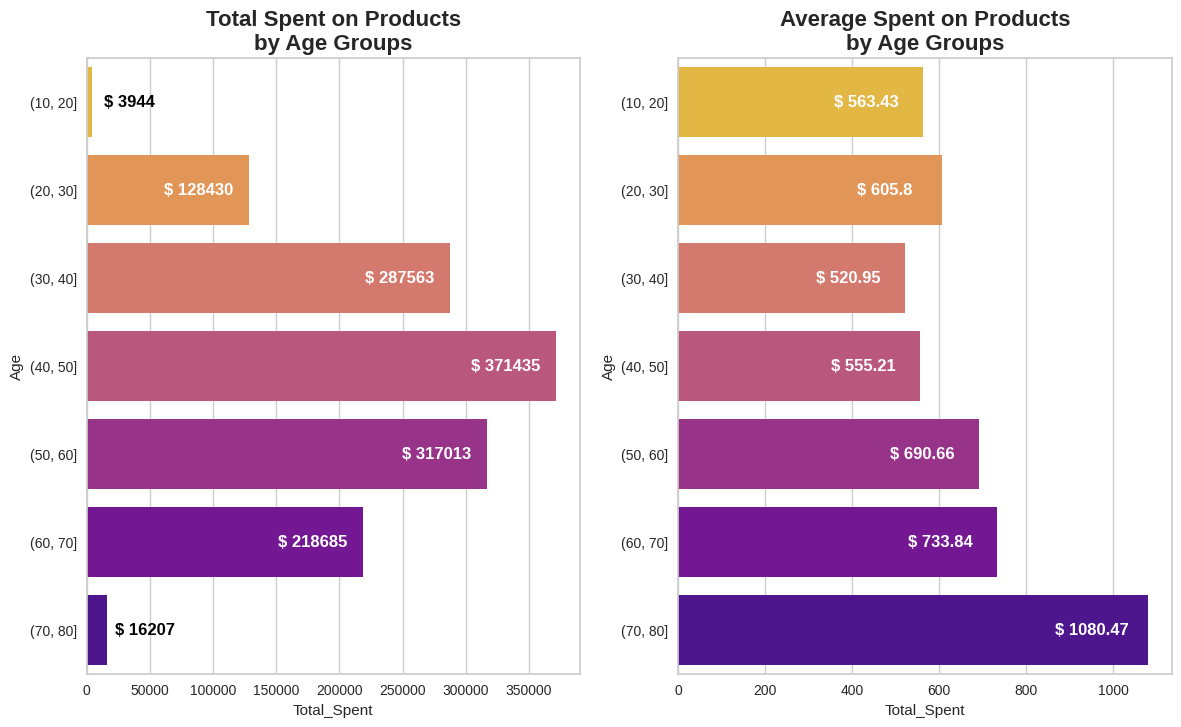

In [ ]:
df2 = df.copy()
df2['Age'] = group
   ##Creating DataFrame Copy with Age Groups:
   #df2 = df.copy(): Creates a copy of the original DataFrame.
   #df2['Age'] = group: Adds a new column 'Age' to df2 containing the age groups calculated earlier using binning.

# Group by 'Age' and calculate the total and average spent on products
sum_group = df2[['Total_Spent', 'Age']].groupby('Age').sum()
mean_group = df2[['Total_Spent', 'Age']].groupby('Age').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()
##Creating Subplots:
#fig, axes = plt.subplots(1, 2, figsize=(14, 8)): Creates a figure with two subplots arranged horizontally
      #plt.subplots: This function is used to create a figure and a set of subplots.
      #1, 2: Specifies that we want to create 1 row and 2 columns of subplots. In this case, there will be two subplots arranged horizontally.
      #figsize=(14, 8): Sets the size of the entire figure to be 14 inches in width and 8 inches in height.
      #fig: This variable represents the entire figure, including all the subplots.
      #axes: This variable is a numpy array containing references to the individual subplots. In this case, since we have 1 row and 2 columns, axes will be an array with two elements, each representing a subplot.

# Plot 1: Total Spent on Products by Age Groups
sns.barplot(x=sum_group['Total_Spent'], y=sum_group.index, palette='plasma_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)
    #sns.barplot(...): Creates a horizontal bar plot showing the total spent on products for each age group.
    #x=sum_group['Total_Spent']: Specifies the values to be plotted on the x-axis. Here, it's the total amounts spent on products for each age group, extracted from the sum_group DataFrame.
    #y=sum_group.index: Specifies the categorical variable for the y-axis. In this case, it's the index of the sum_group DataFrame, which corresponds to the age groups.
    #palette='plasma_r': Sets the color palette for the bars. 'plasma_r' is a perceptually uniform colormap in reverse order.
    #ci=None: Disables the confidence interval, as it is not applicable to this bar plot.
    #orient='h': Specifies a horizontal orientation for the bar plot.
    #ax=axes[0]: Indicates that the plot should be drawn on the first subplot (index 0) of the axes array.
    ##axes[0].set_title(...):
    #axes[0]: Accesses the first subplot in the axes array.
    #set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16): Sets the title for the first subplot. The title is 'Total Spent on Products by Age Groups', with specified font weight and size.

for i,v in enumerate(sum_group['Total_Spent']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)
    ##This code part of a loop that iterates over the values in the sum_group['Total_Spent'] series. It adds annotations to the bars in the first subplot of the figure, specifically adjusting the position and styling based on the index (i) of each bar.
    #Loop (for i, v in enumerate(sum_group['Total_Spent']):):
      #enumerate(sum_group['Total_Spent']): Iterates over the values in the Total_Spent column of the sum_group DataFrame, providing both the index (i) and value (v) in each iteration.
       #enumerate Function: enumerate is a built-in Python function that adds a counter to an iterable and returns it as an enumerate object. It takes an iterable (in this case, the 'Total_Spent' column of the sum_group DataFrame) and returns pairs of the form (index, value).
      #if i == 0 or i == 6:: Checks if the current index is 0 or 6 (corresponding to the first and last bars in the horizontal bar plot).
       #axes[0].text(v + 30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12): If the condition is met, it adds an annotation to the bar, displaying the total spent value (v). The annotation is centered on the bar, positioned to the right of the bar (v + 30000), with specific styling attributes.
      #else:: For indices other than 0 or 6, it adds annotations with a different style:
       #axes[0].text(v - 40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12): The annotation is positioned to the left of the bar (v - 40000) and has a white font color, creating a visual contrast.

# Plot 2: Average Spent on Products by Age Groups
sns.barplot(x=mean_group['Total_Spent'], y=mean_group.index, palette='plasma_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Spent']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

Insights from graphs


The distribution of the data was not equal for each group. There was only 21 people in total of the first group and the last group. That's why there was a huge contrast on total spent

Since the number of people in each group was not balanced, we can use average spent. People over 70 years old spent more money on products compared to the rest of the age group with more than 1000 dollars, It's 2 times higher than 30-40 years people did in the same period of time

(0.0, 1.0, 0.0, 1.0)

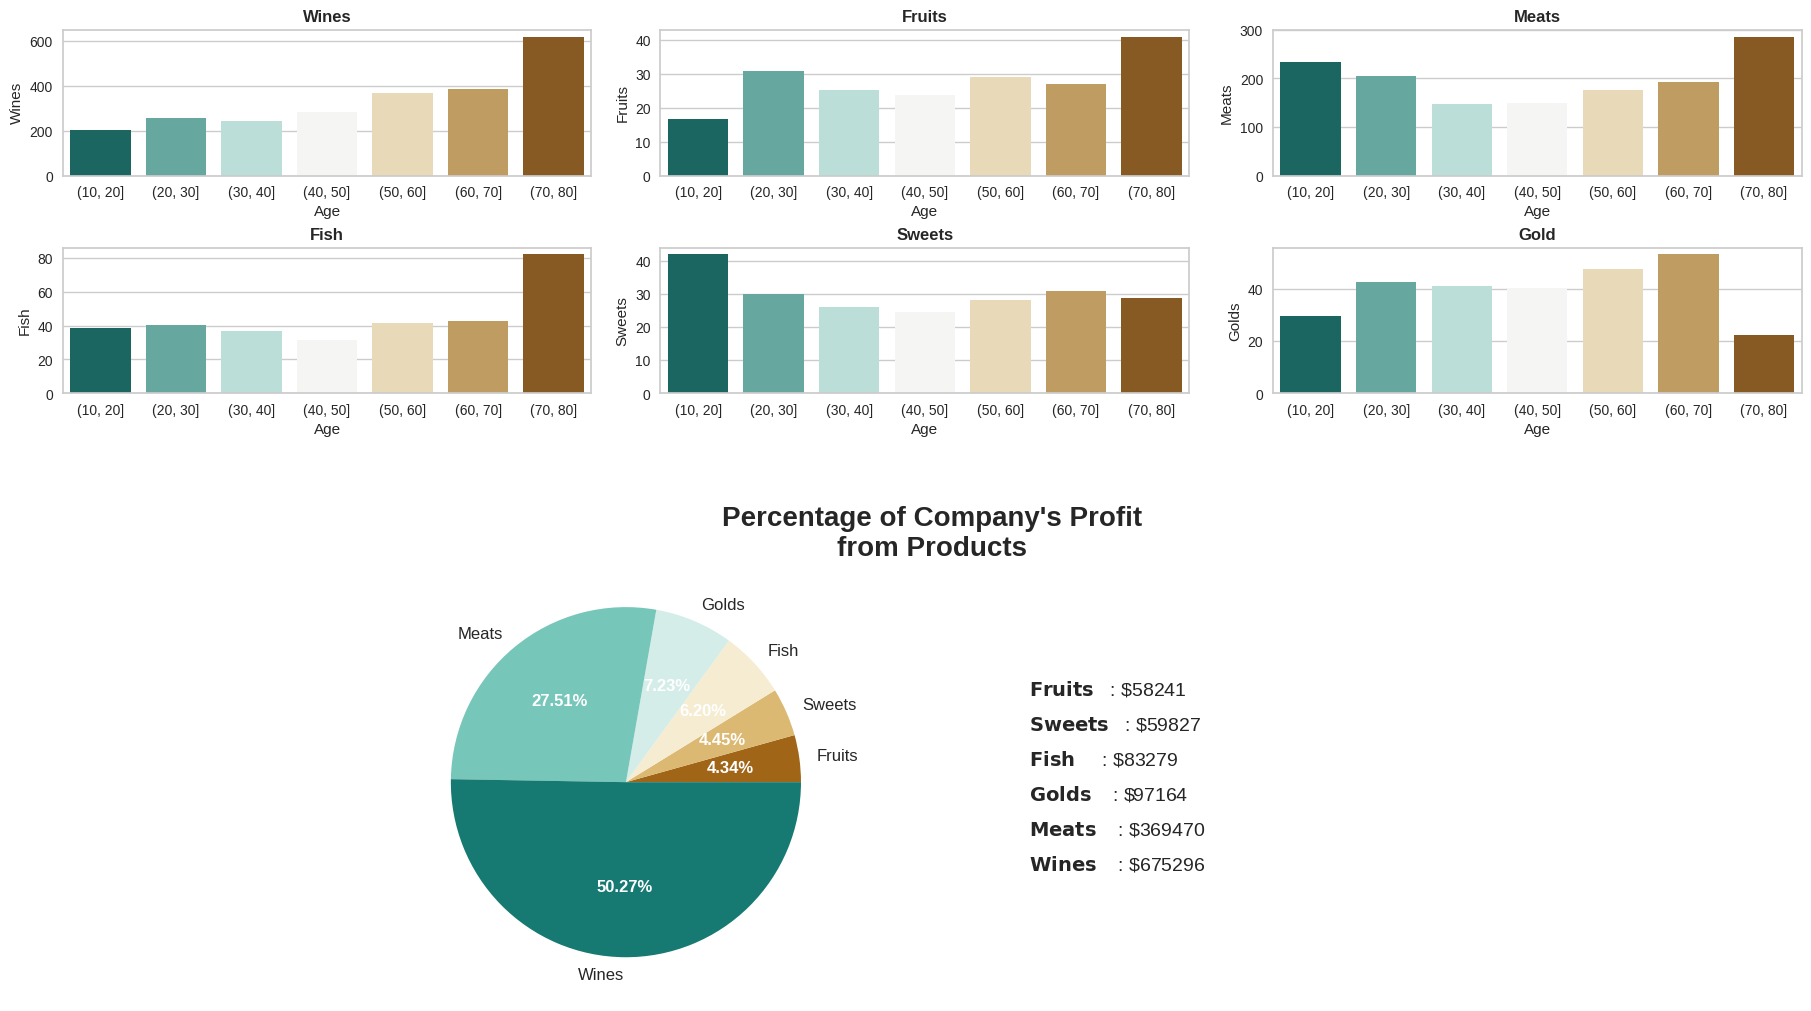

In [ ]:
fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5], [6,6,7], [6,6,7], [6,6,7]],
                              constrained_layout=True, figsize=(18,10))
     #plt.subplot_mosaic: This function is used to create a complex subplot layout.
       #[[0, 1, 2], [3, 4, 5], [6, 6, 7], [6, 6, 7], [6, 6, 7]]: Specifies the arrangement of subplots in a 5x3 grid. The numbers correspond to the indices of subplots in the axd array.
       #constrained_layout=True: Ensures that the layout is automatically adjusted for better spacing.
       #figsize=(18, 10): Sets the size of the entire figure to be 18 inches in width and 10 inches in height.
       #fig.suptitle("Customer's Average Spent on Products\nby Age Groups", weight='bold', fontsize=20)

# Bar plot
sns.barplot(data=df, x=group, y='Wines', palette='BrBG_r', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x=group, y='Fruits', palette='BrBG_r', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x=group, y='Meats', palette='BrBG_r', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x=group, y='Fish', palette='BrBG_r', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x=group, y='Sweets', palette='BrBG_r', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x=group, y='Golds', palette='BrBG_r', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')
    #For each product category (Wines, Fruits, Meats, Fish, Sweets, Gold), a bar plot is created using Seaborn's barplot function.
      #data=df: Specifies the DataFrame containing the data.
      #x=group: Sets the x-axis variable to be the age groups.
      #y='...': Specifies the product category for the y-axis.
      #palette='BrBG_r': Sets the color palette for the bars.
      #ci=None: Disables the confidence interval on the plot.
      #ax=axd[...]: Specifies the subplot where the bar plot should be drawn.

# Pie chart  to represent the percentage of the company's profit from different product categories
data = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values()

palette = sns.color_palette('BrBG')
wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

    #data = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values(): Calculates the total profit for each product category and sorts the data in ascending order.
    #palette = sns.color_palette('BrBG'): Defines a color palette for the pie chart. In this case, it uses the 'BrBG' (Brown to Beige) color palette from Seaborn.
    #wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12)): Creates the pie chart using the pie function. The x parameter is set to the data, labels are assigned from the index of data, autopct formats the percentage display, and colors sets the color scheme. The resulting objects (wedges, texts, autotexts) are used for further styling.
    #axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2): Sets the title for the pie chart. The title includes line breaks for better formatting, bold font weight, increased font size, and a slight horizontal offset (x=1.2).
    #for autotext in autotexts: autotext.set_color('white'); autotext.set_weight('bold'): Loops through the autopct text elements (autotexts) and sets their color to white and font weight to bold. This styling is often done to improve visibility and aesthetic appeal.

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axd[7].axis('off')

      #enumerate(zip(data.index, data)): Iterates over pairs of product category names (name) and corresponding profit values (value).
      #zip(data.index, data):
      #data.index: Refers to the index of the data object. In this context, it's the index of the data Series or DataFrame.
      #data: Represents the values of the data Series or DataFrame.
      #zip(data.index, data): Combines the elements from data.index and data into pairs, creating an iterable of tuples. Each tuple contains the corresponding pair of elements from data.index and data.
      #axd[6].text(...): Adds a text annotation to the sixth subplot.
      #2.3: Sets the x-coordinate for the text annotations.
      #0.5 - 0.2 * i: Sets the y-coordinate for each text annotation, adjusting vertically based on the index i.

      ##r"$\bf{" + name + "}$":
       #r": Denotes a raw string literal, meaning backslashes \ are treated as literal characters and not as escape characters.
       #"$\bf{" + name + "}$": Constructs a string using LaTeX formatting for bold text.
       #"$\bf{": LaTeX command for starting bold text.
       #name: The actual product category name.
       #"}$"`: LaTeX command for ending bold text.
      #"\t": Represents a tab character for spacing.
      #":": Adds a colon to separate the product category name from its value.
      #"\ $": Adds a space and a dollar sign for formatting.
      #str(value): Converts the numerical value (value) to a string for concatenation.
      #fontsize=14: Sets the font size for the text annotations.

      #axd[7]: Specifies the eighth subplot.
      #axis('off'): Turns off the axis for the subplot, effectively creating an empty space.

Insights from graphs

All the products were dominated by people over 70 years old except for the sweets and golds

The oldest group's average spent on wines was incredibly high above 600 dollars

Wines were the company's best selling product followed by meats, and golds. For wine products only, it yielded more than 675k dollars in a span of 3 years. It's 50.27% of company's income

(0.0, 1.0, 0.0, 1.0)

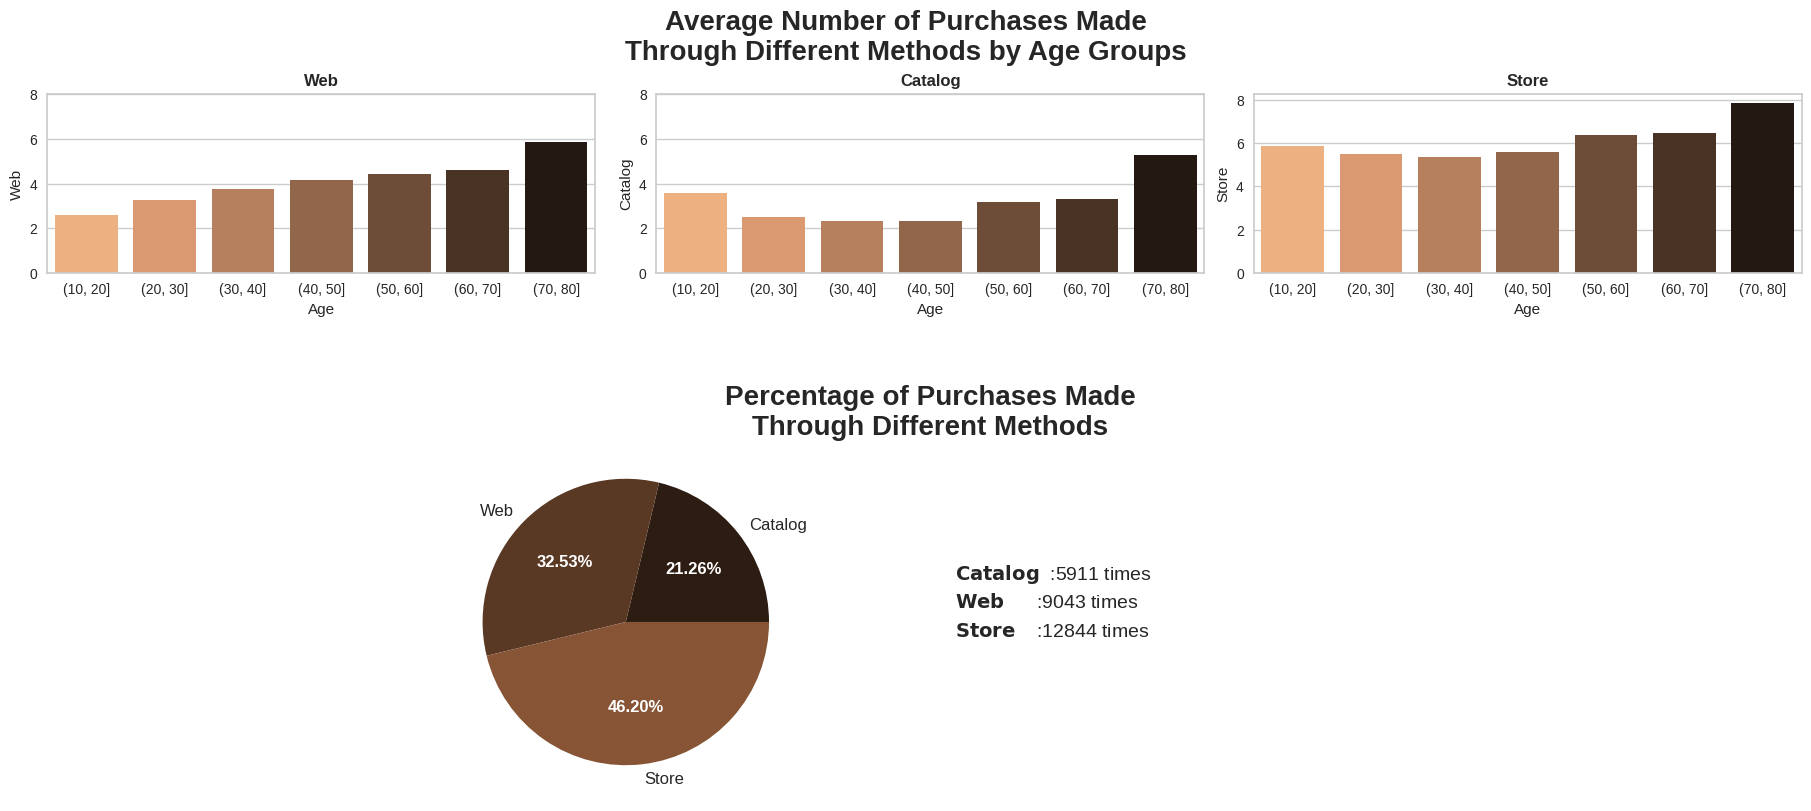

In [ ]:
##This code generates a complex subplot layout to visualize the average number of purchases made through different methods (Web, Catalog, Store) by age groups.

fig, axd = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axd[0], ylim=custom_ylim)
plt.setp(axd[1], ylim=custom_ylim)
    #custom_ylim: Defines a custom y-axis limit for the first two subplots.
    #plt.setp: Adjusts the y-axis limits for the first two subplots.

# Bar plot
sns.barplot(data=df, x=group, y='Web', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Web', weight='bold')
sns.barplot(data=df, x=group, y='Catalog', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x=group, y='Store', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Store', weight='bold')

# Pie chart
data = df[['Web', 'Catalog', 'Store']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axd[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=20, x=1.35)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[3].text(2.3, 0.3-0.2*i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

axd[4].axis('off')

Insights from graphs

Purchases made through web, catalog, and store were also dominated by people over 70 years old even though the number of people in that age group were only 15 (look at the number of people of each group). It's because the number of purchases they made were higher than the rest of age groups

A large number of successful purchases occurred directly in the store. It accounted for 46.2% of total purchases made to the company

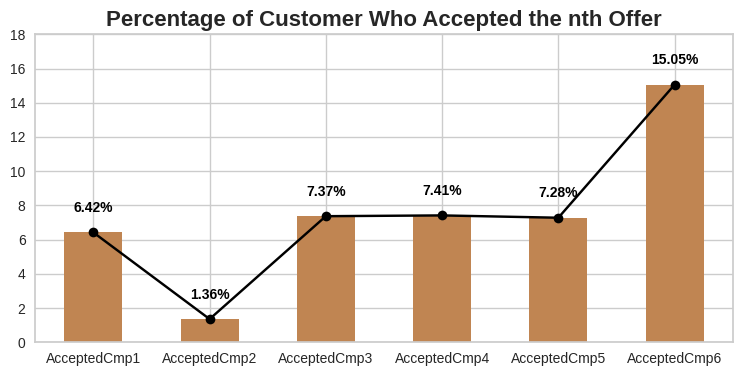

In [ ]:
# Renaming the 'Response' column to 'AcceptedCmp6'
df.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)

# Creating a bar plot and line plot for the percentage of accepted offers
plt.figure(figsize=(9,4))
plt.title('Percentage of Customer Who Accepted the nth Offer', weight='bold', fontsize=16)

# Calculating the percentage for each offer
percent = df.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]*100/len(df)

# Creating the bar plot with a specified color
ax = percent.plot.bar(color='#c08552')

# Creating the line plot with a copper colormap
percent.plot(style='o-', colormap='copper')
   #style='o-': This parameter sets the style of the plot. Here, 'o-' specifies that the plot should include both markers (circles) and lines connecting the markers. The 'o' represents circles (markers), and the '-' represents lines.

# Setting the y-axis limits for better visualization
plt.setp(ax, ylim=(0, 18))

# Adding text annotations on the bars to display the percentage values
for i,v in enumerate(percent):
    plt.text(i, v+1.2, '{:.2f}%'.format(v), horizontalalignment='center', weight='bold', color='Black', fontsize=10)

    #In summary, this code generates a visualization that displays the percentage of customers who accepted each of the offers (AcceptedCmp1 to AcceptedCmp6). The bar plot shows the percentages, and the line plot provides a visual representation. Text annotations on the bars show the exact percentage values.




**Insights from graphs**


*   The percentage of people who directly accepted the offer in the first campaign were just 6.42%. The number became even smaller in the second campaign with just 1.36% of the customers

*   The last campaign successfully drew the most customers compared to the previous campaigns with 15.05% percentage of customers.


<Axes: title={'center': 'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

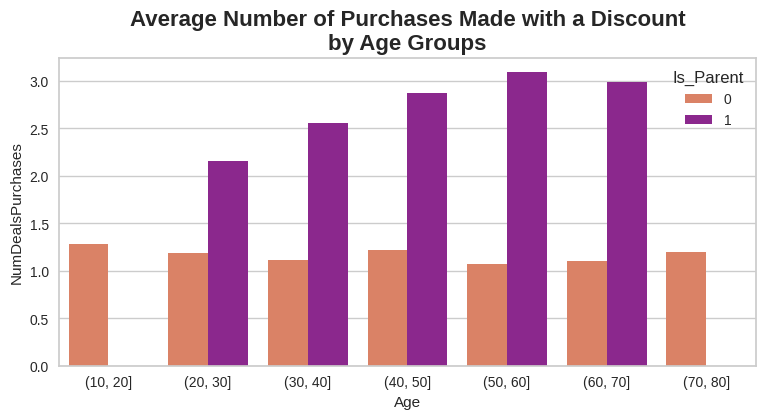

In [ ]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Is_Parent', ci=None, palette='plasma_r')

Insights from graphs

Parents were the ones who were attracted more easily by discounts. It's clearly shown on the graph above where in this case the number of purchases made with a discount by parents surpassed non-parents

<Axes: title={'center': 'Feature correlation'}>

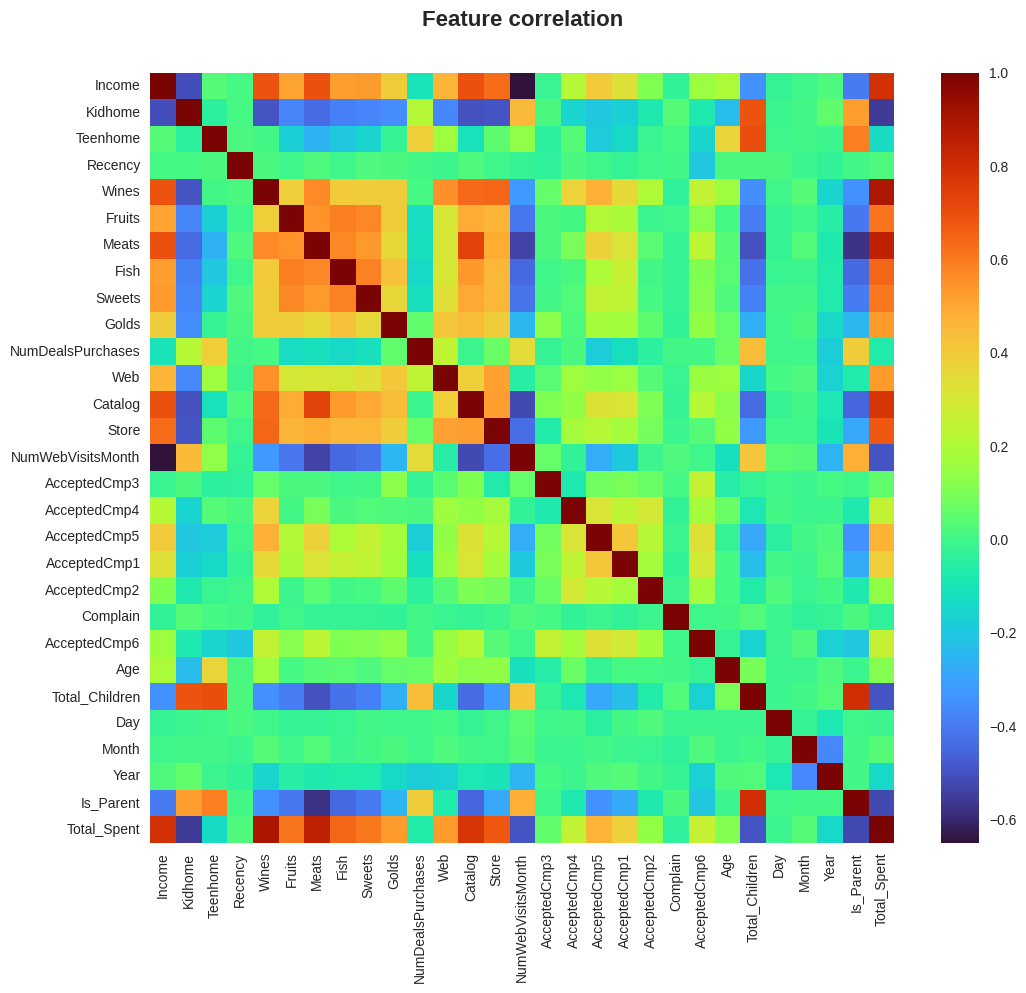

In [ ]:
data = df.select_dtypes(include=[np.number]).columns
  ##The expression df.select_dtypes(include=[np.number]).columns is a pandas DataFrame method used for selecting columns based on their data types:
    #df.select_dtypes(include=[np.number]): This part of the code filters columns in the DataFrame df based on their data types. The parameter include=[np.number] specifies that only columns with numerical data types should be included. It's using NumPy's np.number to encompass both integer and floating-point numeric types.
    #.columns: This retrieves the column names from the resulting DataFrame after the data type filtering. It returns an Index object containing the column names.

plt.figure(figsize=(12,10))
plt.title('Feature correlation', weight='bold', fontsize=16, y=1.05)
    #y=1.05: This parameter adjusts the vertical position of the title. A value greater than 1 would move the title upward relative to its default position. The intention here is often to provide some space between the title and the plot.

sns.heatmap(df[data].corr(), cmap='turbo')
    #sns.heatmap(df[data].corr(), cmap='turbo'): This creates a heatmap using the Seaborn library.
    #It computes the correlation matrix for the selected numerical features (df[data].corr()) and visualizes it using colors. The 'turbo' colormap is specified to provide color variation.
        #The heatmap visually represents the correlation coefficients between pairs of numerical features. The color intensity and direction indicate the strength and nature of the correlation:
            #Dark blue indicates a strong negative correlation.
            #Dark red indicates a strong positive correlation.
            #Lighter colors (closer to yellow) indicate weaker or no correlation.
        #This type of visualization is useful for understanding relationships between different features in the dataset. It can help identify patterns, dependencies, or multicollinearity among numerical variables.

Insights from graphs

Apparently, total children and parenthood status have minor correlation on customer's total spent
As we expected, income and all products are the features that influence total spent the most

**DATA PROCESSING**


In [ ]:
##One-Hot Encoding is suitable when dealing with nominal categorical variables (categories with no inherent order). It creates binary columns for each category, and no ordinal information is assumed.

#Purpose of code: This code performs one-hot encoding, creating dummy variables for categorical features (obj_feat) in the DataFrame df.
#How it is done: It creates binary columns for each unique category in the categorical features. The original categorical columns are dropped, and the dummy variables are concatenated with the original DataFrame.

# Selecting columns with non-numeric data types (categorical features)
obj_feat = df.select_dtypes(exclude=[np.number]).columns
    #df.select_dtypes(exclude=[np.number]).columns: This selects columns from the DataFrame df that have non-numeric data types (e.g., object, category). The result is an array of column names corresponding to categorical features.

# Creating dummy variables (one-hot encoding) for categorical features
dummies = get_dummies(df[obj_feat], drop_first=True)
# Concatenating the dummy variables with the original DataFrame
df_final = pd.concat([df, dummies], axis=1)
# Dropping the original categorical columns from the final DataFrame
df_final.drop(obj_feat, axis=1, inplace=True)
# Displaying the shape of the final DataFrame
df_final.shape

      #df.select_dtypes(exclude=[np.number]).columns: This selects columns from the DataFrame df that have non-numeric data types (e.g., object, category). The result is an array of column names corresponding to categorical features.
      #get_dummies(df[obj_feat], drop_first=True): This function, presumably from the pandas library, is used to perform one-hot encoding on the selected categorical features (df[obj_feat]). It creates dummy variables for each category, and drop_first=True is used to drop the first level of each categorical variable to avoid multicollinearity issues.
      #get_dummies(...): This function is applied to the selected subset of the DataFrame. It converts categorical variable(s) into dummy/indicator variables using one-hot encoding.
      #df[obj_feat]: This selects the subset of the DataFrame df containing only the columns identified as categorical features (obj_feat). These are likely columns with non-numeric data types, such as strings or categories.
      #drop_first=True: This parameter is set to True to drop the first level of each categorical variable. This is a common practice to avoid the "dummy variable trap" or multicollinearity, where the presence of one dummy variable can be predicted from the others.
      #pd.concat([df, dummies], axis=1): This concatenates the original DataFrame df with the dummy variables (dummies) along the columns (axis=1).
      #df_final.drop(obj_feat, axis=1, inplace=True): This drops the original categorical columns from the final DataFrame df_final.

#In summary, the code is transforming categorical variables into a format suitable for machine learning models, particularly by using one-hot encoding to convert categorical columns into numerical representations (dummy variables). The final DataFrame df_final includes the original numeric features and the newly created dummy variables while excluding the original categorical columns.
#Why?: Many machine learning algorithms are sensitive to the scale of input features. Standard scaling (or normalization) ensures that all numerical features have a mean of 0 and a standard deviation of 1. This makes the features more comparable and prevents some features from dominating others simply because of their scale. It is particularly important for algorithms that rely on distances between data points, such as k-nearest neighbors or support vector machines




(2212, 38)

In [ ]:
# standardizing the numerical features in  DataFrame df_final using the StandardScaler from scikit-learn
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the scaler and transforming the data
scaled = scaler.fit_transform(df_final)

# Creating a new DataFrame with the scaled features
df_final_scaled = pd.DataFrame(scaled, columns=df_final.columns)

# Displaying the first few rows of the scaled DataFrame
df_final_scaled.head()


#scaler = StandardScaler(): This creates an instance of the StandardScaler class from scikit-learn. The StandardScaler is used for standardizing features by removing the mean and scaling to unit variance.
#scaled = scaler.fit_transform(df_final): This fits the scaler to the data in df_final and transforms the data. The result (scaled) is a NumPy array containing the standardized values.
#pd.DataFrame(scaled, columns=df_final.columns): This creates a new DataFrame (df_final_scaled) using the standardized values. The column names are retained from the original DataFrame (df_final).
#df_final_scaled.head(): This displays the first few rows of the DataFrame with the standardized features.

  ##Standardization is a common preprocessing step in machine learning workflows. It ensures that numerical features have a mean of 0 and a standard deviation of 1, making them more comparable and potentially improving the performance of certain machine learning algorithms that are sensitive to the scale of input features.



,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,...,Total_Spent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner,Dayofweek_Tuesday,Dayofweek_Wednesday,Dayofweek_Thursday,Dayofweek_Friday,Dayofweek_Saturday,Dayofweek_Sunday
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,1.676245,-0.944572,-0.158187,-1.349603,-0.40674,-0.417997,-0.406740,-0.399921,-0.395347,-0.427654
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.963297,-0.944572,-0.158187,-1.349603,-0.40674,-0.417997,-0.406740,-0.399921,-0.395347,2.338340
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,0.280110,-0.944572,-0.158187,0.740959,-0.40674,2.392364,-0.406740,-0.399921,-0.395347,-0.427654
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.920135,-0.944572,-0.158187,0.740959,-0.40674,-0.417997,2.458574,-0.399921,-0.395347,-0.427654
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.307562,1.058681,-0.158187,0.740959,-0.40674,-0.417997,-0.406740,-0.399921,-0.395347,2.338340


In [ ]:
##Label Encoding is applied when dealing with ordinal categorical variables (categories with a meaningful order). It assigns numerical labels to categories based on their order.

# Transform df for the next step which visualizes the data
#code is using the LabelEncoder from scikit-learn to transform categorical variables in the DataFrame df into numerical labels.

# Creating a LabelEncoder instance
le = LabelEncoder()

# Looping through categorical features (excluding the last one)
for obj in obj_feat[:-1]:
    # Transforming the categorical variable to numerical labels
    trans = le.fit_transform(df[obj])

    # Updating the original DataFrame with the numerical labels
    df[obj] = trans

#le = LabelEncoder(): This creates an instance of the LabelEncoder class from scikit-learn. The LabelEncoder is used to convert categorical labels into numerical labels.
#for obj in obj_feat[:-1]:: This loop iterates over the categorical features in obj_feat, excluding the last one. The loop variable obj represents each categorical feature.
#trans = le.fit_transform(df[obj]): This line fits the LabelEncoder to the unique values of the current categorical feature (obj) and transforms the original labels into numerical labels. The result is stored in the variable trans.
#df[obj] = trans: This updates the original DataFrame df by replacing the original categorical column with its corresponding numerical labels.

#The purpose of using LabelEncoder is to convert categorical variables into a format that can be used as input for machine learning algorithms, which often expect numerical input. However, it's important to note that using LabelEncoder may introduce ordinal information that might not be appropriate for some algorithms. For purely nominal data, one-hot encoding is usually preferred.


CLUSTERING

The Elbow method is a common technique for determining the optimal number of clusters in KMeans Clustering. It involves plotting the sum of squared distances (SSE) against different values of k (number of clusters) and looking for the "elbow" point where the rate of decrease in SSE slows down.

Setting a random state (in this case, 123) ensures that the random initialization of cluster centroids in KMeans is consistent across runs, providing reproducibility in the analysis. This helps maintain consistency when comparing results or running the analysis multiple times.

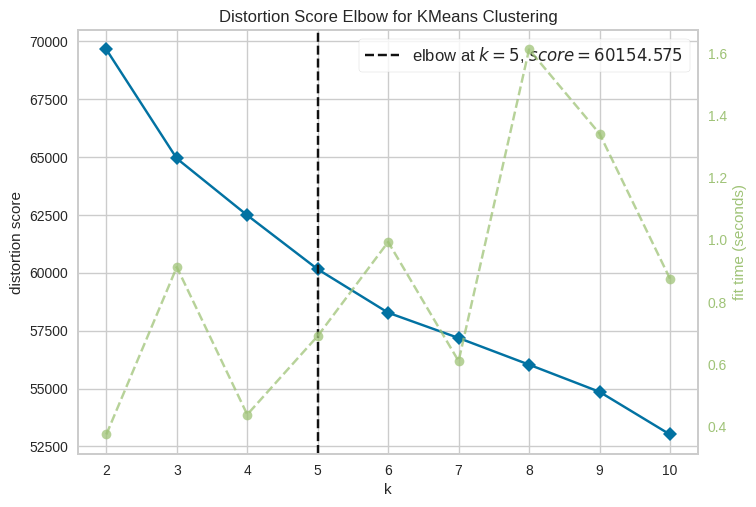

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow.fit(df_final_scaled)
elbow.show()


#It appears you are using the KElbowVisualizer from the Yellowbrick library to visualize the Elbow method for determining the optimal number of clusters in KMeans. This is a great approach! The code you provided is using the KMeans algorithm with the KElbowVisualizer to find the optimal k.

#KElbowVisualizer(KMeans(random_state=123), k=10): This initializes the KElbowVisualizer with a KMeans estimator and sets the random state to 123. It is configured to evaluate up to 10 clusters.
#By setting k=10, you are exploring the possibility of having different numbers of clusters ranging from 1 to 10. This allows the Elbow method to evaluate the sum of squared distances (SSE) for a variety of cluster configurations.
#elbow.fit(df_final_scaled): This fits the KMeans model to the standardized data (df_final_scaled) and computes the SSE for different values of k.
#elbow.show(): This displays the visualization of the Elbow method, helping you identify the optimal number of clusters based on the "elbow" point in the plot.

   #The Elbow method plot should show the SSE decreasing as k increases. The point where the rate of decrease slows down (the "elbow") is typically chosen as the optimal number of clusters. This value is where adding more clusters provides diminishing returns in terms of reducing SSE.
   #n addition to the Elbow method, there are several other methods and metrics to help determine the optimal number of clusters in KMeans. Here are a few alternatives: Silhouette Score, Davies-Bouldin Index, Gap Statistics.
      #Continuous Line (Distortion Score): The continuous line represents the distortion scores (sum of squared distances) for different values of k. It shows how the distortion changes as the number of clusters increases. The elbow point, where the line starts to flatten out, is often where you'd choose the optimal k.
      #Gapped Line or Shaded Area (Standard Error): The gapped line or shaded area represents the standard error of the distortion scores. It provides a measure of uncertainty or variability in the distortion scores for each k. The gaps or variations in the line might indicate the level of uncertainty in determining the optimal k.

In [ ]:
#code is using the KMeans clustering algorithm to assign cluster labels to the data and then adding a new column 'Cluster' to the DataFrame to store these cluster labels.

# Set number of clusters to 5
model = KMeans(n_clusters=5, random_state=123)

# Fit the KMeans model to the scaled data and predict cluster labels
yhat = model.fit_predict(df_final_scaled)

# Add a new column 'Cluster' to the original DataFrame to store cluster labels
df['Cluster'] = yhat


#model = KMeans(n_clusters=5, random_state=123): This line initializes a KMeans clustering model with n_clusters=5, indicating that you want to partition your data into 5 clusters. The random_state=123 ensures reproducibility by fixing the random seed.
#yhat = model.fit_predict(df_final_scaled): This line fits the KMeans model to the scaled data (df_final_scaled) and predicts the cluster labels for each data point. The resulting yhat contains an array of cluster labels assigned to each observation in your dataset.
#df['Cluster'] = yhat: This line adds a new column named 'Cluster' to your original DataFrame (df). The values in this column correspond to the cluster labels predicted by the KMeans model for each corresponding row in the DataFrame.
  #After executing this code, your DataFrame (df) will have a new column 'Cluster' indicating the cluster assignment for each data point based on the KMeans clustering with 5 clusters

<Axes: xlabel='Cluster', ylabel='count'>

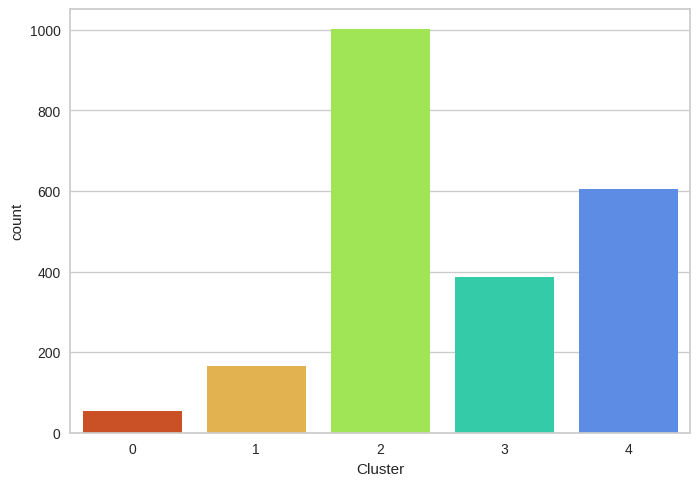

In [ ]:
sns.countplot(data=df, x='Cluster', palette='turbo_r')

#This line uses Seaborn's countplot function to create a bar plot of the counts of each unique value in the 'Cluster' column of the DataFrame df. The x='Cluster' argument specifies that the x-axis should represent the 'Cluster' column.
#palette='turbo_r':The palette parameter specifies the color palette to be used for the bars in the plot. In this case, 'turbo_r' is a colormap from the matplotlib library that provides a range of colors.
#plt.show(): This line displays the generated plot.

**CUSTOMER PROFILING**

<Axes: label='2', xlabel='Cluster', ylabel='Income'>

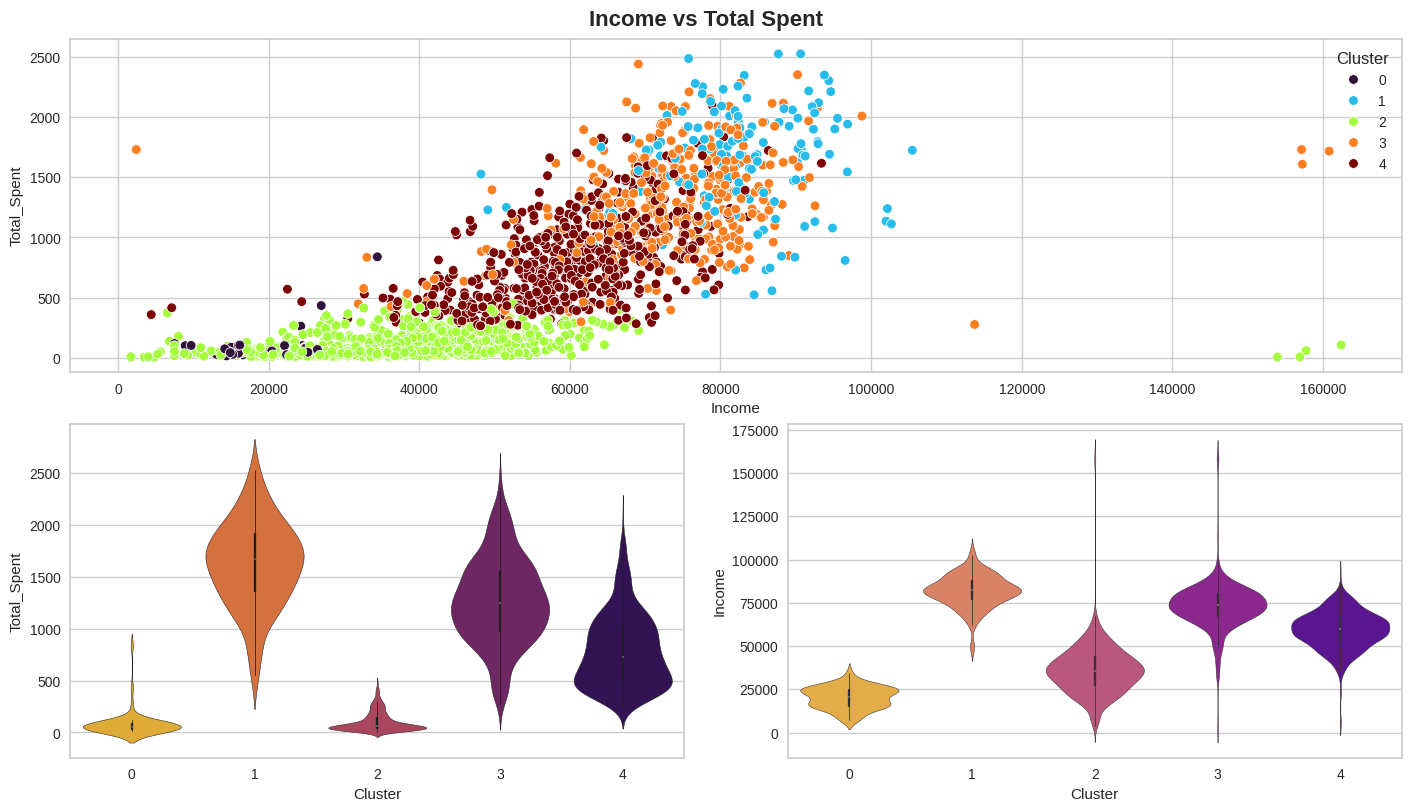

In [ ]:
#This code uses matplotlib and seaborn to create a mosaic plot with three subplots, comparing the relationships between 'Income' and 'Total Spent' across different clusters.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 subplot layout-
 ##1x3 Subplot Layout:"1" represents the number of rows in the layout."3" represents the number of columns in the layout.
   #This layout means that the figure will have one row, and within that row, there will be three subplots side by side. Each subplot is accessed through the axd variable, which is a reference to the individual subplots in the layout.
fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
#using constrained_layout=True helps in creating visually appealing and well-organized subplots by automatically adjusting the layout to avoid clutter and improve readability.
fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)
# Subplot 0: Scatter plot of 'Income' vs 'Total Spent' colored by 'Cluster'
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Cluster', palette='turbo', ax=axd[0])
# Subplot 1: Violin plot of 'Total Spent' across different clusters
sns.violinplot(data=df, x='Cluster', y='Total_Spent', palette='inferno_r', ax=axd[1])
# Subplot 2: Violin plot of 'Income' across different clusters
sns.violinplot(data=df, x='Cluster', y='Income', palette='plasma_r', ax=axd[2])

#fig, axd = plt.subplot_mosaic([[0, 0], [1, 2]], constrained_layout=True, figsize=(14, 8)): This line creates a figure with a 1x3 subplot layout using subplot_mosaic. The layout is defined as a 2D array, where each element represents a subplot.
#fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16): This sets the main title for the entire figure.
#Scatter Plot (Subplot 0):sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Cluster', palette='turbo', ax=axd[0]): The ax=axd[0] parameter is specifying that the current subplot (in this case, a scatter plot) should be created within the first subplot (index 0) of the layout defined by plt.subplot_mosaic
#-This creates a scatter plot of 'Income' against 'Total Spent'. Points are colored based on the 'Cluster' column, using the 'turbo' color palette.
#Violin Plot (Subplot 1): sns.violinplot(data=df, x='Cluster', y='Total_Spent', palette='inferno_r', ax=axd[1]): This generates a violin plot showing the distribution of 'Total Spent' across different clusters.
#Violin Plot (Subplot 2): sns.violinplot(data=df, x='Cluster', y='Income', palette='plasma_r', ax=axd[2]): This creates a violin plot illustrating the distribution of 'Income' across different clusters.


From those graphs, we can deduce that:



Cluster 0: Lowest spending & Lowest income

Cluster 1: Highest spending & Highest income

Cluster 2: Low spending & low income

Cluster 3: High spending & High income

Cluster 4: Average spending & Average income



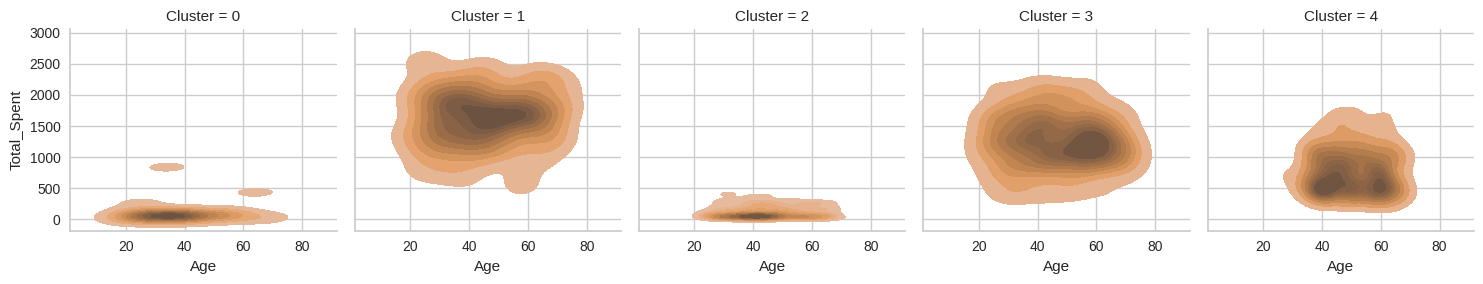

In [ ]:
#The code you provided is using Seaborn's FacetGrid to create a grid of subplots based on the 'Cluster' column in the DataFrame df. Then, it maps the sns.kdeplot function to each subplot to visualize the kernel density estimation (KDE) of the relationship between 'Age' and 'Total_Spent' within each cluster.
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Age', 'Total_Spent', color='#c08552', fill=True)

#FacetGrid is a class in the Seaborn data visualization library that facilitates the creation of a grid of subplots based on the values of one or more categorical variables. It allows you to easily create multiple plots for different subsets of your data and compare them in a structured grid.
 #sns.FacetGrid(data=df, col='Cluster'):Creates a FacetGrid based on the 'Cluster' column, resulting in a grid of subplots where each subplot corresponds to a different cluster.
 #g.map(sns.kdeplot, 'Age', 'Total_Spent', color='#c08552', fill=True): Maps the sns.kdeplot function to each subplot in the FacetGrid.
  #A KDE is a non-parametric way to estimate the probability density function of a continuous random variable.
 #sns.kdeplot is used to create kernel density plots for the relationship between 'Age' and 'Total_Spent'.
 #The color='#c08552' parameter sets the color of the KDE plots.
 #The fill=True parameter fills the area under the KDE curve.
#In summary, this code generates a grid of subplots, each displaying a kernel density plot of the relationship between 'Age' and 'Total_Spent' for a specific cluster. This visualization helps observe how the distribution of these variables varies across different clusters.

Text(0.6, 3900, '0: Non Parent\n1: Parent')

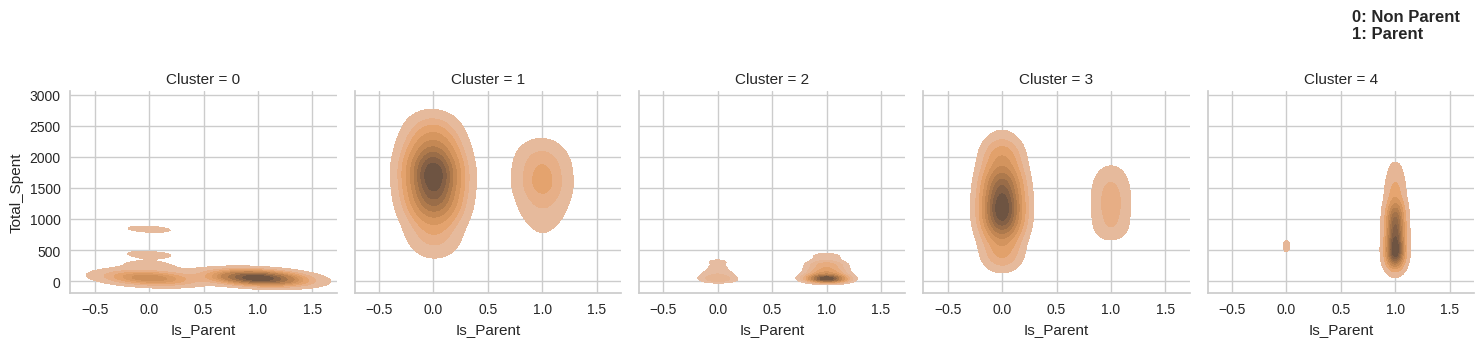

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Is_Parent', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.6,3900, '0: Non Parent\n1: Parent', weight='bold', fontsize=12)
#0.6: The x-coordinate where the text will be placed on the plot.
#3900: The y-coordinate where the text will be placed on the plot.


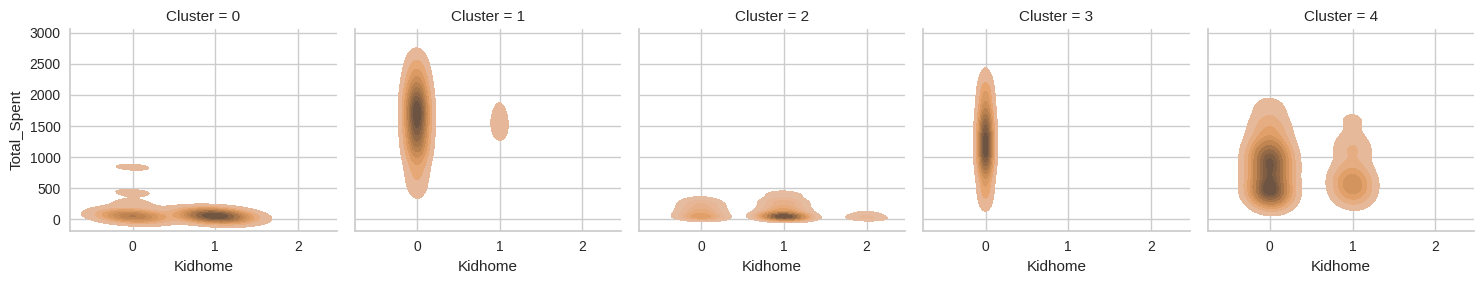

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'Total_Spent', color='#c08552', fill=True)

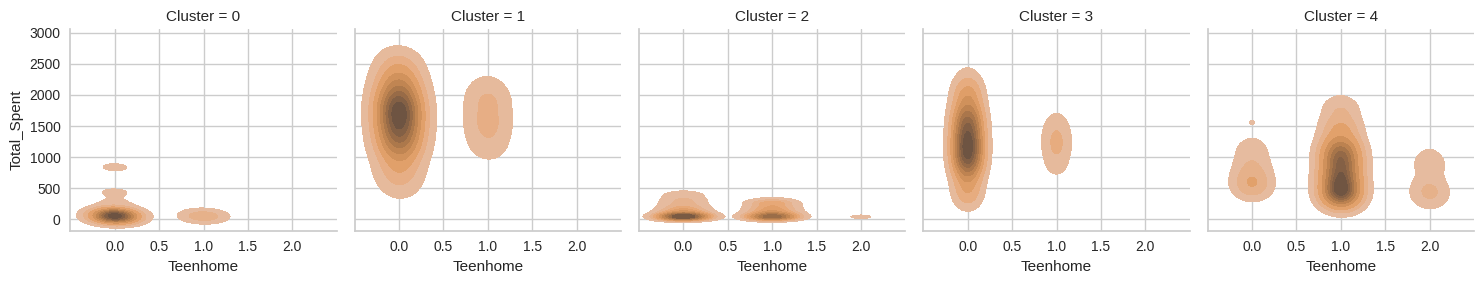

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Teenhome', 'Total_Spent', color='#c08552', fill=True)

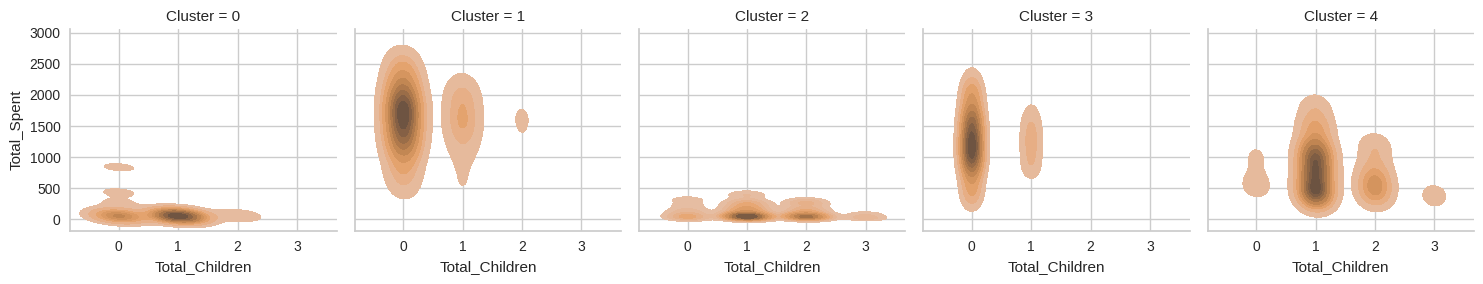

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Total_Children', 'Total_Spent', color='#c08552', fill=True)

Text(0.7, 3900, '0: Alone\n1: Partner')

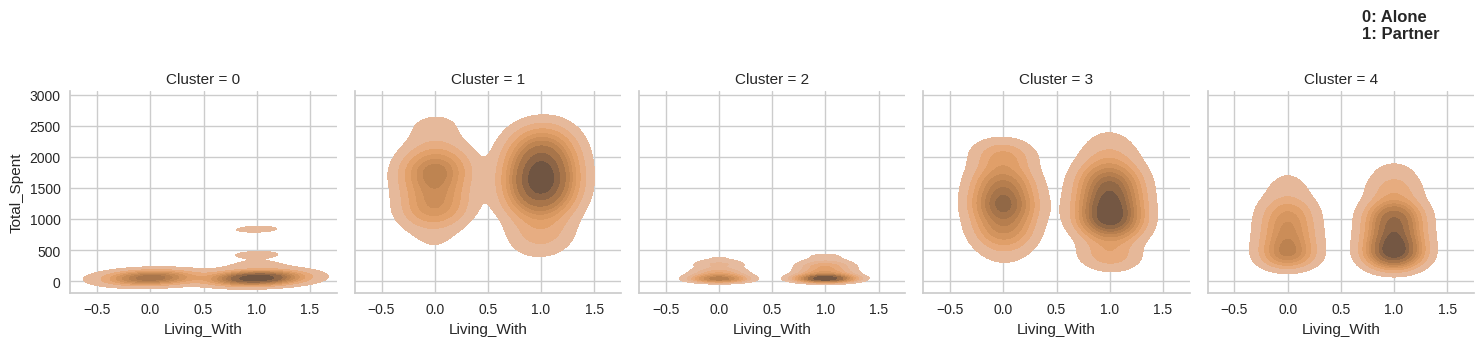

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Living_With', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.7,3900, '0: Alone\n1: Partner', weight='bold', fontsize=12)

Text(0.6, 3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate')

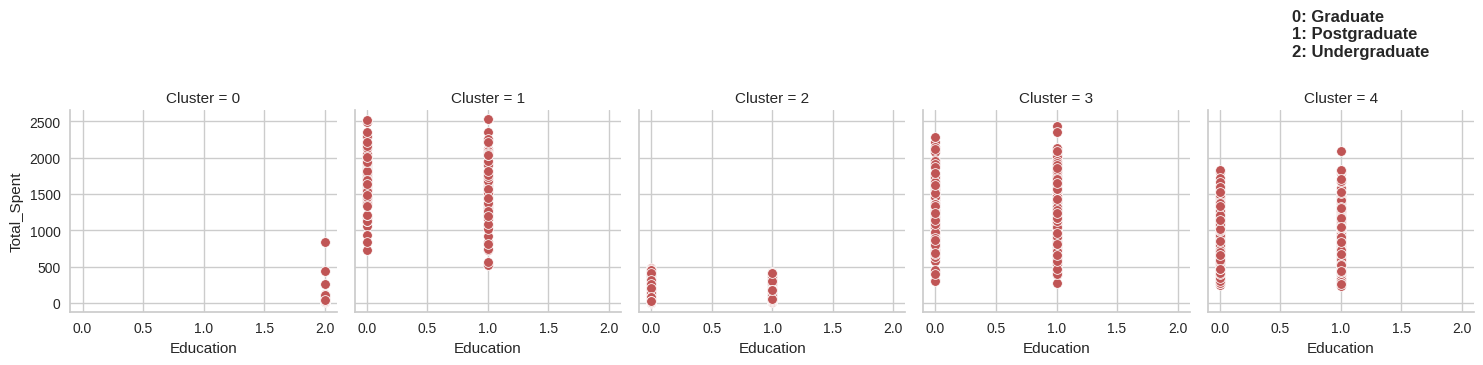

In [ ]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.scatterplot, 'Education', 'Total_Spent', color='#c05555')

plt.text(0.6,3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate', weight='bold', fontsize=12)

<Axes: title={'center': "Average Number of Days Since Customer's Last Purchase\nby Clusters"}, xlabel='Cluster', ylabel='Recency'>

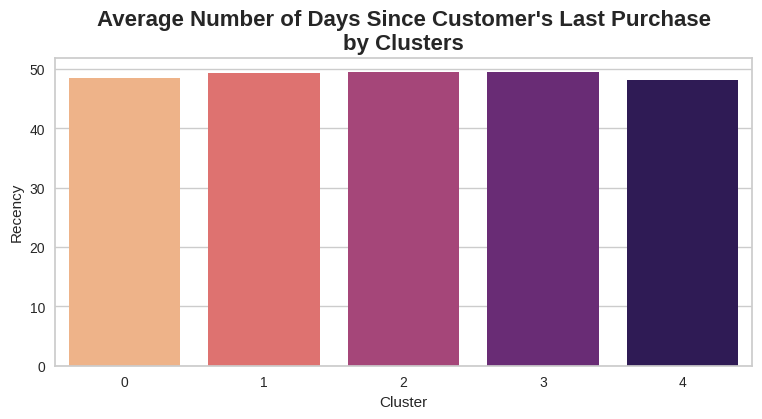

In [ ]:
plt.figure(figsize=(9,4))
plt.title("Average Number of Days Since Customer's Last Purchase\nby Clusters", weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='Recency', palette='magma_r', ci=None)

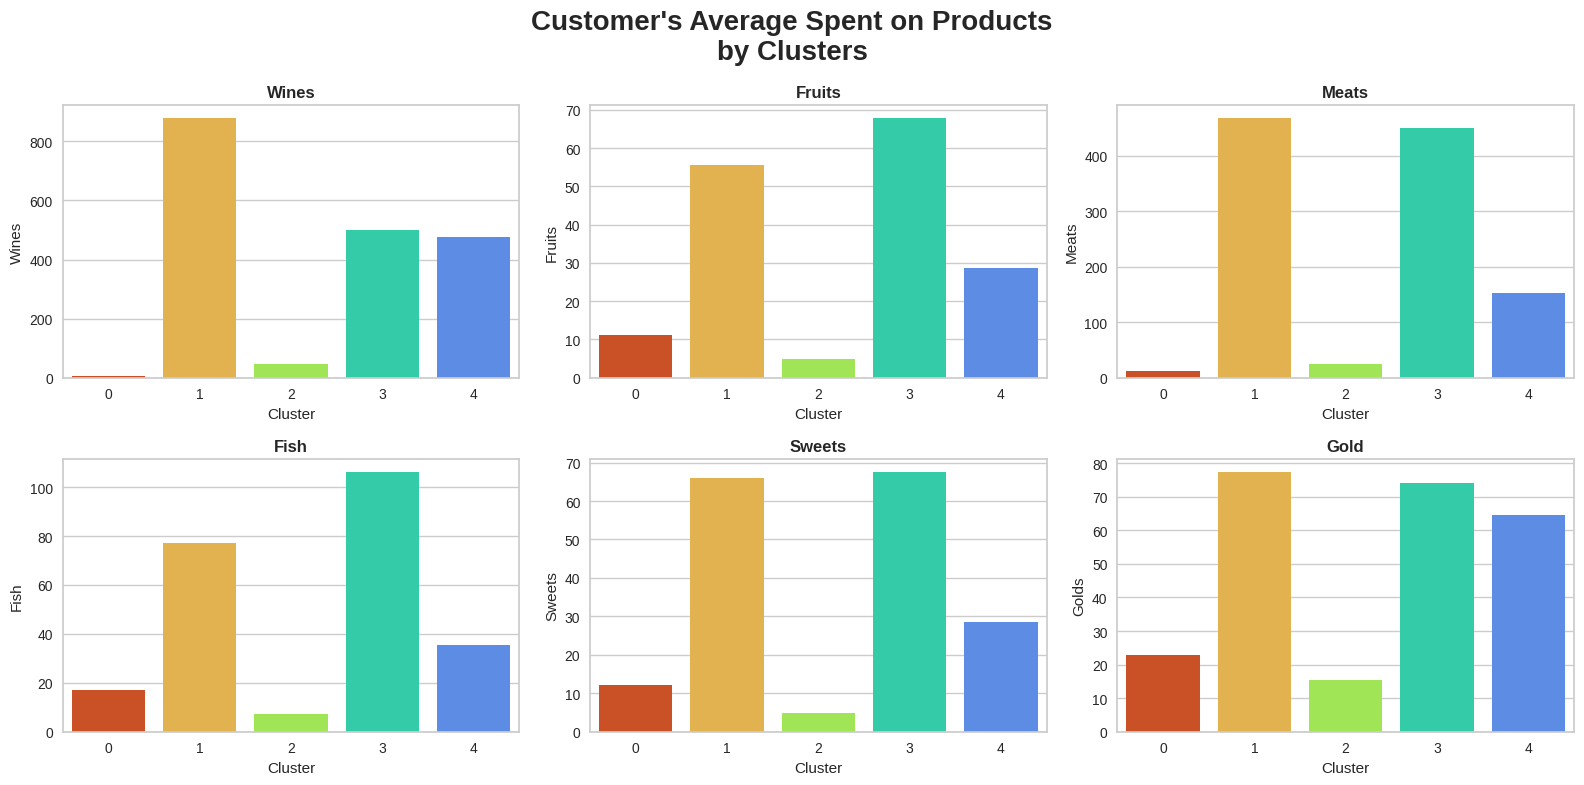

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()
# The line axes = axes.flatten() is used to flatten a multidimensional array or list of axes into a 1D array. In the context of Matplotlib subplots or Seaborn FacetGrids, it's a common operation to simplify the handling of multiple axes.

sns.barplot(data=df, x='Cluster', y='Wines', palette='turbo_r', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fruits', palette='turbo_r', ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x='Cluster', y='Meats', palette='turbo_r', ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fish', palette='turbo_r', ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x='Cluster', y='Sweets', palette='turbo_r', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x='Cluster', y='Golds', palette='turbo_r', ci=None, ax=axes[5])
axes[5].set_title('Gold', weight='bold')

plt.tight_layout()

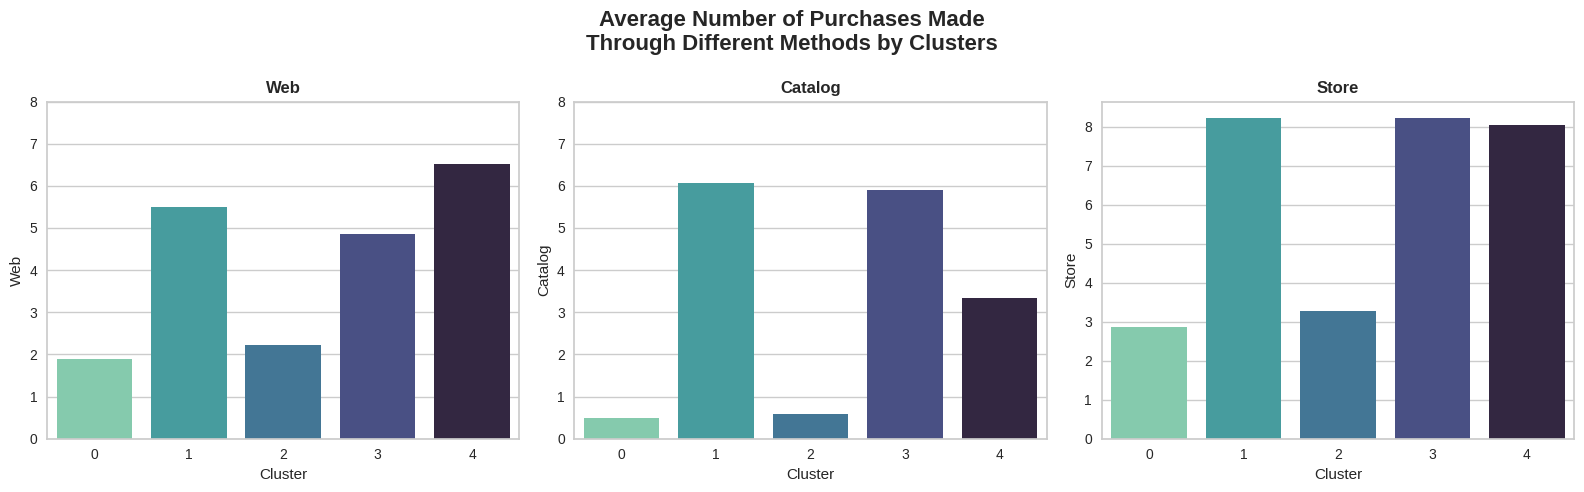

In [ ]:

fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=16)
axes = axes.flatten()

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x='Cluster', y='Web', palette='mako_r', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=df, x='Cluster', y='Catalog', palette='mako_r', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x='Cluster', y='Store', palette='mako_r', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

plt.tight_layout()


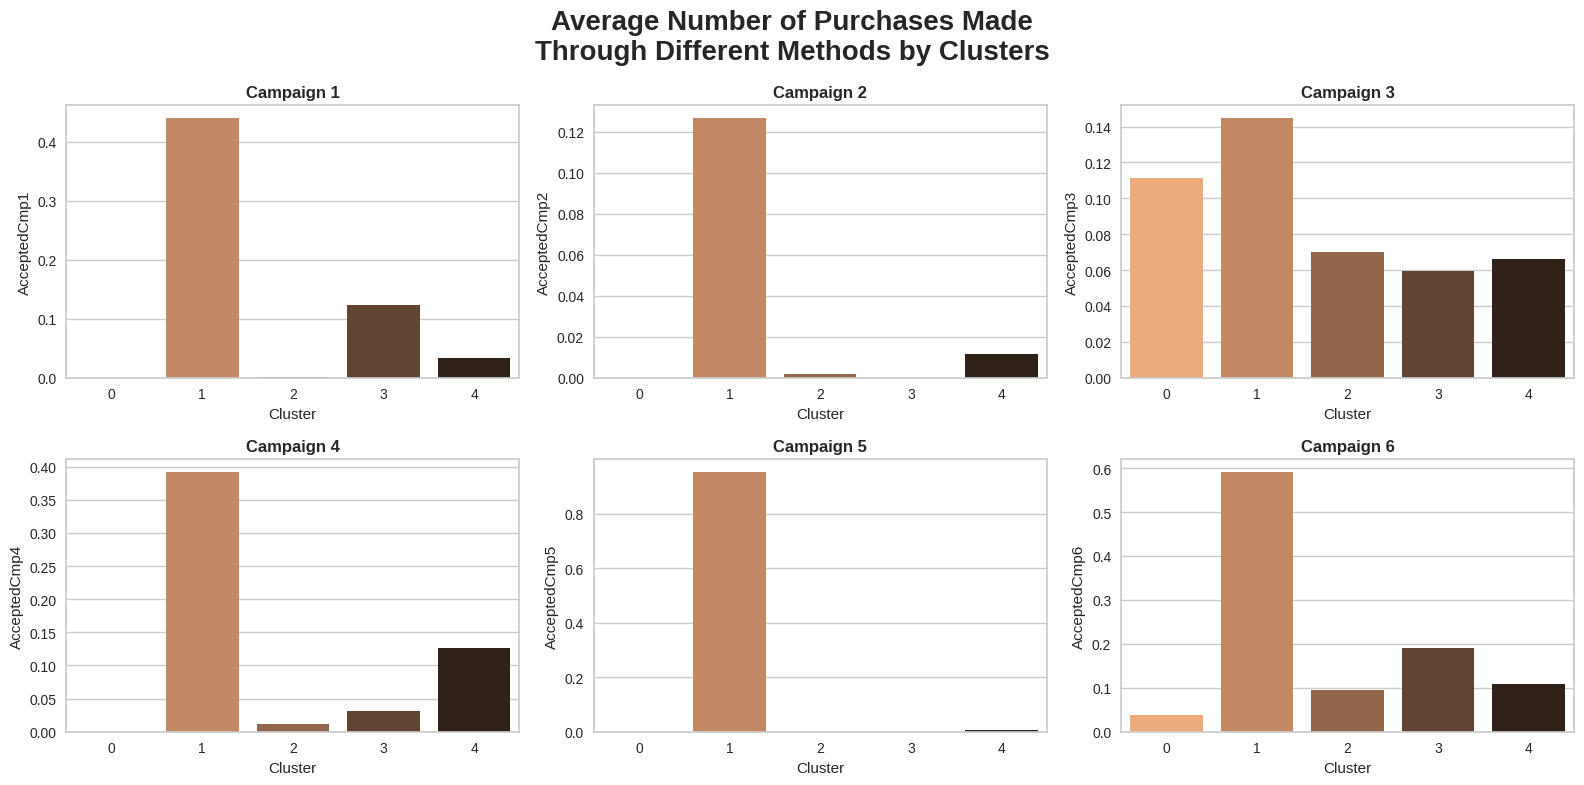

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=df, x='Cluster', y='AcceptedCmp1', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Campaign 1', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp2', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Campaign 2', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp3', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Campaign 3', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp4', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Campaign 4', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp5', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Campaign 5', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp6', palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Campaign 6', weight='bold')

plt.tight_layout()

<Axes: title={'center': 'Average Number of Purchases Made with a Discount\nby Clusters'}, xlabel='Cluster', ylabel='NumDealsPurchases'>

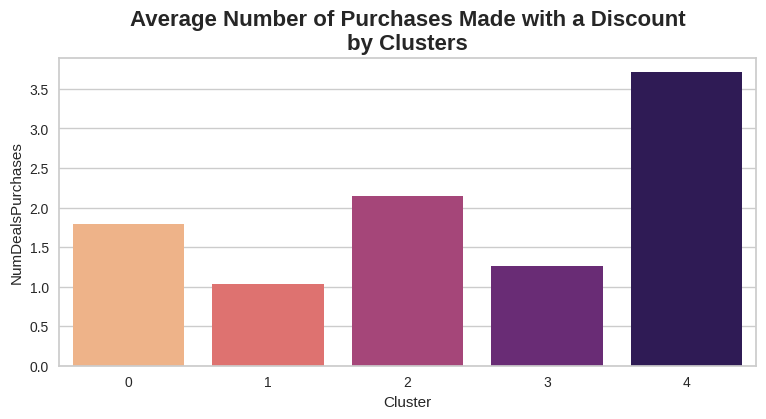

In [ ]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Clusters', weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='NumDealsPurchases', ci=None, palette='magma_r')

Here's the conclusion of each cluster:

**Cluster 0:**

Relatively younger

Have a max 2 children, dominated by kids

Undergraduate students or those who don't pursue a bachelor degree

**Cluster 1:**

Span all ages

A large number of them are not a parent

Actively participated in all 6 campaigns

**Cluster 2:**

Span all ages

Majority of them are a parent

Have a max 3 children

**Cluster 3:**

Span all ages

Most of them are not a parent

For those who are a parent, they have 1 teenager at home

**Cluster 4:**

Relatively older

Almost all of them are a parent, except a very few number of people

Have a max 3 children, dominated by teenagers

High participation in discount products